In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from scipy.stats import norm, binom, poisson, chi2, bernoulli, gamma, beta, dirichlet, uniform, expon, halfnorm, halfcauchy
import matplotlib.tri as tri
import math
from math import gamma
from operator import mul
from operator import mul

class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
    midpoints = []
    for i in range(3):
        point1 = corners[(i + 1) % 3]
        point2 = corners[(i + 2) % 3]
        mid = (point1 + point2) / 2.0
        midpoints.append(mid)
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

def draw_pdf_contours(dist, nlevels=100, subdiv=8, **kwargs):
    corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
    triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

# Define a function to plot the selected distribution
def plot_dist(dist, param1, param2, param3):
    # Round parameters to 2 decimal places
    param1 = round(param1, 2)
    param2 = round(param2, 2)
    param3 = round(param3, 2)
    # Create a figure
    plt.figure()
    # Generate x values
    
    # Plot the distribution based on the selected name and parameters
    if dist == "Normal":
        x = np.linspace(-10, 10, 100)
        y = norm.pdf(x, param1, param2)
        plt.plot(x, y)
        plt.title(f"Normal distribution with mean {param1} and standard deviation {param2}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Chi square":
        x = np.linspace(0, 10, 100)
        y = chi2.pdf(x, param1)
        plt.plot(x, y)
        plt.title(f"Chi square distribution with {param1} degrees of freedom")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Half-normal":
        x = np.linspace(0, 10, 100)
        y = halfnorm.pdf(x, scale=param1)
        plt.plot(x, y)
        plt.title(f"Half-normal distribution with scale {param1}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Half-cauchy":
        x = np.linspace(0, 10, 100)
        y = halfcauchy.pdf(x, scale=param1)
        plt.plot(x, y)
        plt.title(f"Half-cauchy distribution with scale {param1}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Exponential":
        x = np.linspace(0, 10, 100)
        y = expon.pdf(x, scale=param1)
        plt.plot(x, y)
        plt.title(f"Exponential distribution with scale {param1}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Uniform":
        x = np.linspace(0, 10, 100)
        y = uniform.pdf(x, loc=param1, scale=param2)
        plt.plot(x, y)
        plt.title(f"Uniform distribution with loc {param1} and scale {param2}")
        plt.xlabel('Value')
        plt.ylabel('Probability')

    elif dist == "Beta":
        x = np.linspace(0, 1, 100)
        y = beta.pdf(x, param1, param2)
        plt.plot(x, y)
        plt.title(f"Beta distribution with shape parameters {param1} and {param2}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Gamma":
        x = np.linspace(0, 10, 100)
        y = gamma.pdf(x, param1, scale=param2)
        plt.plot(x, y)
        plt.title(f"Gamma distribution with shape {param1} and scale {param2}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    

    elif dist == "Poisson":
        x = np.linspace(1, 10, 10)
        y = poisson.pmf(x, param1)
        plt.plot(x, y, 'o', ms=8)
        plt.vlines(x, 0, y, lw=5)
        plt.title(f"Poisson distribution with mean {param1}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Bernoulli":
        x=[0,1]
        bd = bernoulli(param1)
        plt.bar(x, bd.pmf(x))
        plt.title(f"Bernoulli distribution with success probability {param1}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    elif dist == "Binomial":
        x = list(range(int(param1) + 1))
        y = [binom.pmf(x_i, int(param1), param2) for x_i in x ] 
        plt.plot(x, y, 'o', ms=8)
        plt.vlines(x, 0, y, lw=5)
        plt.title(f"Binomial distribution with {int(param1)} trials and success probability {param2}")
        plt.xlabel('Value')
        plt.ylabel('Probability')
    
    
    elif dist == "Dirichlet":
        draw_pdf_contours(Dirichlet([param1, param2, param3]))
        plt.title(f"Dirichlet distribution with concentration parameters {param1}, {param2} and {param3}")

    # Show the plot
    plt.show()

# Define a function to update the parameters widgets based on the distribution selected
def update_params(*args):
    # Get the current distribution value
    dist = dist_widget.value
    # Set the parameters widgets visibility, min, max, and step based on the distribution
    if dist == "Normal":
        
        param1_widget.min = -5
        param1_widget.max = 5
        param1_widget.step = 0.1
        param1_widget.description = "Mean:"
        
        param2_widget.min = 0.1
        param2_widget.max = 5
        param2_widget.step = 0.1
        param2_widget.description = "Standard deviation:"

        param2_widget.layout.visibility = 'visible'
        param1_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Chi square":
        
        param1_widget.min = 1
        param1_widget.max = 10
        param1_widget.step = 1
        param1_widget.description = "Degrees of freedom:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Half-normal":
            
        param1_widget.min = 0.1
        param1_widget.max = 5
        param1_widget.step = 0.1
        param1_widget.description = "Scale:"
    
        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Half-cauchy":
                
        param1_widget.min = 0.1
        param1_widget.max = 5
        param1_widget.step = 0.1
        param1_widget.description = "Scale:"
    
        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Exponential":
            
        param1_widget.min = 0.1
        param1_widget.max = 5
        param1_widget.step = 0.1
        param1_widget.description = "Scale:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Uniform":

        param1_widget.min = 0
        param1_widget.max = 5
        param1_widget.step = 0.1
        param1_widget.description = "Loc:"
        
        param2_widget.min = 0.1
        param2_widget.max = 10
        param2_widget.step = 0.1
        param2_widget.description = "Scale:"
        
        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Gamma":
        
        param1_widget.min = 0.5
        param1_widget.max = 6
        param1_widget.step = 0.5
        param1_widget.description = "Shape:"
        
        param2_widget.min = 0.2
        param2_widget.max = 2
        param2_widget.step = 0.2
        param2_widget.description = "Scale:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Beta":
        
        param1_widget.min = 0.2
        param1_widget.max = 3
        param1_widget.step = 0.2
        param1_widget.description = "Alpha:"
        
        param2_widget.min = 0.2
        param2_widget.max = 3
        param2_widget.step = 0.2
        param2_widget.description = "Beta:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'hidden'


    elif dist == "Poisson":
        
        param1_widget.min = 1
        param1_widget.max = 15
        param1_widget.step = 1
        param1_widget.description = "Lambda:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Bernoulli":
        
        param1_widget.min = 0
        param1_widget.max = 1
        param1_widget.step = 0.05
        param1_widget.description = "Success probability:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'hidden'
        param3_widget.layout.visibility = 'hidden'

    elif dist == "Binomial":
        
        param1_widget.min = 1
        param1_widget.max = 10
        param1_widget.step = 1
        param1_widget.description = "Number of trials:"

        param2_widget.min = 0
        param2_widget.max = 1
        param2_widget.step = 0.01
        param2_widget.description = "Success probability:"
        
        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'hidden'

    

    elif dist == "Dirichlet":
        
        param1_widget.min = 1
        param1_widget.max = 20
        param1_widget.step = 1
        param1_widget.description = "Alpha 1:"
        
        param2_widget.min = 1
        param2_widget.max = 20
        param2_widget.step = 1
        param2_widget.description = "Alpha 2:"
        
        param3_widget.min = 1
        param3_widget.max = 20
        param3_widget.step = 1
        param3_widget.description = "Alpha 3:"

        param1_widget.layout.visibility = 'visible'
        param2_widget.layout.visibility = 'visible'
        param3_widget.layout.visibility = 'visible'

        param1_widget.continuous_update=False
        param2_widget.continuous_update=False
        param3_widget.continuous_update=False

# Create widgets to select the distribution name and parameters
dist_widget = widgets.Dropdown(options=["Normal", "Chi square", "Half-normal", "Half-cauchy", "Uniform", "Exponential", "Beta", "Gamma", "Bernoulli", "Binomial", "Poisson",  "Dirichlet"], value="Normal", description="Distribution:")

dist_widget.observe(update_params, 'value')

param1_widget = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description="Mean:")
param2_widget = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description="Standard Deviation:")
param3_widget = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description="Parameter 3:")
param3_widget.layout.visibility = 'hidden'
# Use interact to create the interactive plot
widgets.interact(plot_dist, dist=dist_widget, param1=param1_widget, param2=param2_widget, param3=param3_widget)
;

interactive(children=(Dropdown(description='Distribution:', options=('Normal', 'Chi square', 'Half-normal', 'H…

''

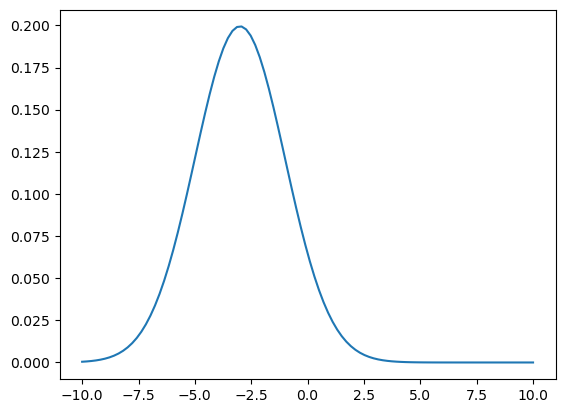

In [4]:
mean=-3
std=2
x = np.linspace(-10, 10, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y);

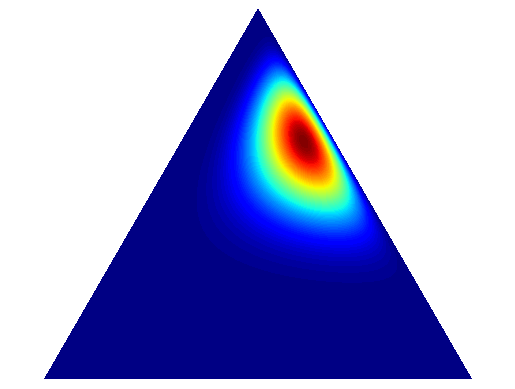

In [17]:
draw_pdf_contours(Dirichlet([2, 5, 10]))